Download the Dataset

In [0]:
#Mount Google drive (change code for local machine). We need to copy generate_dataset.py script to current directory
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
#Download both the images and annotations
#Images
!wget -q http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
#Annotations
!wget -q http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz

In [0]:
#Check Current Directory to makse sure data is downloaded
!ls -l

total 792100
-rw-r--r-- 1 root root  19173078 Jun 30  2012 annotations.tar.gz
drwx------ 3 root root      4096 Mar 31 08:04 drive
-rw------- 1 root root      3354 Mar 31 08:04 generate_dataset.py
-rw-r--r-- 1 root root 791918971 Jun 18  2012 images.tar.gz
drwxr-xr-x 1 root root      4096 Mar 18 16:23 sample_data


In [0]:
#unzip the tar files downloaded 
!tar xf images.tar.gz
!tar xf annotations.tar.gz

In [0]:
#Explore directories
!ls -l

total 792584
drwxr-xr-x 4  501 staff      4096 Jun 30  2012 annotations
-rw-r--r-- 1 root root   19173078 Jun 30  2012 annotations.tar.gz
drwx------ 3 root root       4096 Mar 31 08:04 drive
-rw------- 1 root root       3354 Mar 31 08:04 generate_dataset.py
drwxr-xr-x 2 1001  1001    491520 Jun 18  2012 images
-rw-r--r-- 1 root root  791918971 Jun 18  2012 images.tar.gz
drwxr-xr-x 1 root root       4096 Mar 18 16:23 sample_data


In [0]:
!ls -l images

total 807388
-rwxr-xr-x 1 1001  1001  126923 Jun 18  2012 Abyssinian_100.jpg
-rw-r--r-- 1 1001  1001 1351002 Jun 18  2012 Abyssinian_100.mat
-rw-r--r-- 1  501 staff     495 Jun 29  2012 Abyssinian_100.xml
-rwxr-xr-x 1 1001  1001   49023 Jun 18  2012 Abyssinian_101.jpg
-rw-r--r-- 1 1001  1001  956090 Jun 18  2012 Abyssinian_101.mat
-rw-r--r-- 1  501 staff     494 Jun 29  2012 Abyssinian_101.xml
-rwxr-xr-x 1 1001  1001  165505 Jun 18  2012 Abyssinian_102.jpg
-rw-r--r-- 1 1001  1001 1611487 Jun 18  2012 Abyssinian_102.mat
-rw-r--r-- 1  501 staff     494 Jun 29  2012 Abyssinian_102.xml
-rwxr-xr-x 1 1001  1001  132937 Jun 18  2012 Abyssinian_103.jpg
-rw-r--r-- 1  501 staff     495 Jun 29  2012 Abyssinian_103.xml
-rwxr-xr-x 1 1001  1001   34907 Jun 18  2012 Abyssinian_104.jpg
-rwxr-xr-x 1 1001  1001  141823 Jun 18  2012 Abyssinian_105.jpg
-rw-r--r-- 1  501 staff     496 Jun 29  2012 Abyssinian_105.xml
-rwxr-xr-x 1 1001  1001  197092 Jun 18  2012 Abyssinian_106.jpg
-rw-r--r-- 1  501 staff    

In [0]:
# The picture names have breed names of dogs and cats

In [0]:
#Check the xml annotations folder
!ls -l annotations/xmls

total 14744
-rw-r--r-- 1 501 staff 495 Jun 29  2012 Abyssinian_100.xml
-rw-r--r-- 1 501 staff 494 Jun 29  2012 Abyssinian_101.xml
-rw-r--r-- 1 501 staff 494 Jun 29  2012 Abyssinian_102.xml
-rw-r--r-- 1 501 staff 495 Jun 29  2012 Abyssinian_103.xml
-rw-r--r-- 1 501 staff 496 Jun 29  2012 Abyssinian_105.xml
-rw-r--r-- 1 501 staff 499 Jun 29  2012 Abyssinian_106.xml
-rw-r--r-- 1 501 staff 494 Jun 29  2012 Abyssinian_107.xml
-rw-r--r-- 1 501 staff 494 Jun 29  2012 Abyssinian_108.xml
-rw-r--r-- 1 501 staff 493 Jun 29  2012 Abyssinian_109.xml
-rw-r--r-- 1 501 staff 494 Jun 29  2012 Abyssinian_10.xml
-rw-r--r-- 1 501 staff 493 Jun 29  2012 Abyssinian_110.xml
-rw-r--r-- 1 501 staff 495 Jun 29  2012 Abyssinian_111.xml
-rw-r--r-- 1 501 staff 495 Jun 29  2012 Abyssinian_112.xml
-rw-r--r-- 1 501 staff 495 Jun 29  2012 Abyssinian_113.xml
-rw-r--r-- 1 501 staff 495 Jun 29  2012 Abyssinian_114.xml
-rw-r--r-- 1 501 staff 495 Jun 29  2012 Abyssinian_115.xml
-rw-r--r-- 1 501 staff 494 Jun 29  2012 Abyss

In [0]:
# The data is listed in XML Format

In [0]:
!ls -l annotations/xmls | wc -l

3687


In [0]:
#Install tidy to review XML files
!sudo apt-get install tidy --quiet

Reading package lists...
Building dependency tree...
Reading state information...
tidy is already the newest version (1:5.2.0-2).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [0]:
ls -l

total 792584
drwxr-xr-x 4  501 staff      4096 Jun 30  2012 annotations/
-rw-r--r-- 1 root root   19173078 Jun 30  2012 annotations.tar.gz
drwx------ 3 root root       4096 Mar 31 08:04 drive/
-rw------- 1 root root       3354 Mar 31 08:04 generate_dataset.py
drwxr-xr-x 2 1001  1001    491520 Mar 31 08:06 images/
-rw-r--r-- 1 root root  791918971 Jun 18  2012 images.tar.gz
drwxr-xr-x 1 root root       4096 Mar 18 16:23 sample_data/


In [0]:
# Check one of the XML file to understand annotations
!tidy -xml -i annotations/xmls/wheaten_terrier_170.xml

No warnings or errors were found.

<annotation>
  <folder>OXIIIT</folder>
  <filename>wheaten_terrier_170.jpg</filename>
  <source>
    <database>OXFORD-IIIT Pet Dataset</database>
    <annotation>OXIIIT</annotation>
    <image>flickr</image>
  </source>
  <size>
    <width>500</width>
    <height>330</height>
    <depth>3</depth>
  </size>
  <segmented>0</segmented>
  <object>
    <name>dog</name>
    <pose>Frontal</pose>
    <truncated>0</truncated>
    <occluded>0</occluded>
    <bndbox>
      <xmin>181</xmin>
      <ymin>126</ymin>
      <xmax>299</xmax>
      <ymax>239</ymax>
    </bndbox>
    <difficult>0</difficult>
  </object>
</annotation>

About HTML Tidy: https://github.com/htacg/tidy-html5
Bug reports and comments: https://github.com/htacg/tidy-html5/issues
Official mailing list: https://lists.w3.org/Archives/Public/public-htacg/
Latest HTML specification: http://dev.w3.org/html5/spec-author-view/
Validate your HTML documents: http://validator.w3.org/nu/
Lobby your company 

In [0]:
#Store all the XML files information into a single CSV File
# Will use a python script to do this task

In [0]:
#Move all xml files to images folder, this is needed for python script used next
!mv annotations/xmls/* images/

In [0]:
#Copy generate_dataset.py file to current directory
!cp "/content/drive/My Drive/Colab Notebooks/Advanced CV/generate_dataset.py" .

In [0]:
!ls -l

total 792584
drwxr-xr-x 4  501 staff      4096 Jun 30  2012 annotations
-rw-r--r-- 1 root root   19173078 Jun 30  2012 annotations.tar.gz
drwx------ 3 root root       4096 Mar 31 08:04 drive
-rw------- 1 root root       3354 Mar 31 08:04 generate_dataset.py
drwxr-xr-x 2 1001  1001    491520 Mar 31 08:11 images
-rw-r--r-- 1 root root  791918971 Jun 18  2012 images.tar.gz
drwxr-xr-x 1 root root       4096 Mar 18 16:23 sample_data


In [0]:
#Build CSV file for both
!python generate_dataset.py

class birman: 100 images
class newfoundland: 100 images
class ragdoll: 99 images
class sphynx: 100 images
class american_pit_bull_terrier: 100 images
class pug: 100 images
class bengal: 98 images
class bombay: 100 images
class leonberger: 100 images
class boxer: 100 images
class russian_blue: 100 images
class british_shorthair: 100 images
class persian: 100 images
class saint_bernard: 99 images
class samoyed: 99 images
class abyssinian: 99 images
class chihuahua: 100 images
class siamese: 100 images
class scottish_terrier: 100 images
class wheaten_terrier: 100 images
class basset_hound: 100 images
class maine_coon: 100 images
class staffordshire_bull_terrier: 100 images
class english_cocker_spaniel: 100 images
class keeshond: 100 images
class miniature_pinscher: 100 images
class japanese_chin: 100 images
class american_bulldog: 100 images
class yorkshire_terrier: 100 images
class english_setter: 100 images
class shiba_inu: 100 images
class pomeranian: 100 images
class german_shorthaire

In [0]:
#Splits data into training and set

In [0]:
!ls -l

total 792828
drwxr-xr-x 4  501 staff      4096 Jun 30  2012 annotations
-rw-r--r-- 1 root root   19173078 Jun 30  2012 annotations.tar.gz
drwx------ 3 root root       4096 Mar 31 08:04 drive
-rw------- 1 root root       3354 Mar 31 08:04 generate_dataset.py
drwxr-xr-x 2 1001  1001    491520 Mar 31 08:11 images
-rw-r--r-- 1 root root  791918971 Jun 18  2012 images.tar.gz
drwxr-xr-x 1 root root       4096 Mar 18 16:23 sample_data
-rw-r--r-- 1 root root     198656 Mar 31 08:11 train.csv
-rw-r--r-- 1 root root      46711 Mar 31 08:11 validation.csv


Visualize data

In [0]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import pandas as pd

In [0]:
#Read CSV file as pandas dataframe, csv file has no header
train_df =pd.read_csv('train.csv', header=None,
                      names=['File', 'Height', 'Width','xmin', 'ymin', 'xmax', 'ymax', 'class', 'label'])

In [0]:
print(train_df.shape)
train_df.sample(n=5)

(2984, 9)


,File,Height,Width,xmin,ymin,xmax,ymax,class,label
770,images/boxer_100.jpg,332,500,63,52,213,170,boxer,9
2233,images/american_bulldog_184.jpg,333,500,121,64,365,314,american_bulldog,27
1573,images/wheaten_terrier_114.jpg,375,500,272,93,347,166,wheaten_terrier,19
1949,images/keeshond_123.jpg,333,500,185,22,401,236,keeshond,24
1244,images/Abyssinian_146.jpg,500,333,39,56,242,266,abyssinian,15


In [0]:
#Create a dictionary to hold label and corresonding class name
num_classes = train_df['label'].unique()
label_class_dict= dict(zip(train_df['label'], train_df['class']))

In [0]:
num_classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36])

In [0]:
label_class_dict

{0: 'birman',
 1: 'newfoundland',
 2: 'ragdoll',
 3: 'sphynx',
 4: 'american_pit_bull_terrier',
 5: 'pug',
 6: 'bengal',
 7: 'bombay',
 8: 'leonberger',
 9: 'boxer',
 10: 'russian_blue',
 11: 'british_shorthair',
 12: 'persian',
 13: 'saint_bernard',
 14: 'samoyed',
 15: 'abyssinian',
 16: 'chihuahua',
 17: 'siamese',
 18: 'scottish_terrier',
 19: 'wheaten_terrier',
 20: 'basset_hound',
 21: 'maine_coon',
 22: 'staffordshire_bull_terrier',
 23: 'english_cocker_spaniel',
 24: 'keeshond',
 25: 'miniature_pinscher',
 26: 'japanese_chin',
 27: 'american_bulldog',
 28: 'yorkshire_terrier',
 29: 'english_setter',
 30: 'shiba_inu',
 31: 'pomeranian',
 32: 'german_shorthaired',
 33: 'havanese',
 34: 'egyptian_mau',
 35: 'great_pyrenees',
 36: 'beagle'}

In [0]:
train_df.shape

(2984, 9)

In [0]:
train_df.shape[0]

2984

Show Images with Bounding Box

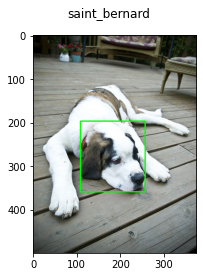

In [0]:
#Pickup a random image number
img_num = np.random.randint(0, train_df.shape[0])

#Read the image and draw a rectangel as per bounding box information
img=cv2.imread(train_df.loc[img_num, 'File'])

cv2.rectangle(img,
              (train_df.loc[img_num, 'xmin'], train_df.loc[img_num, 'ymin']),
              (train_df.loc[img_num, 'xmax'], train_df.loc[img_num, 'ymax']),
              (0,255,0), 2)

#Convert BGR format to RGB
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Draw Image using matplotlib
plt.suptitle(train_df.loc[img_num, 'class'])
plt.imshow(img)
plt.show()

In [0]:
#Read the validation csv file
test_df = pd.read_csv('validation.csv', header=None,
                      names=['File', 'Height', 'Width','xmin', 'ymin', 'xmax', 'ymax', 'class', 'label'])

In [0]:
train_df.shape, test_df.shape

((2984, 9), (702, 9))

 Is the data ready to be fed? No, we need X and Y
 to prepare image data we need to do the following steps
 1. Load the picture into memory
 2. Resize the image
   Why to resize? Conv can work with differnt sizes, because filter size is not dependent on image size. If we use Global average pooling we get same amount of numbers. But all the inputs of a batch must be of same dimension

 3. Convert the image into a Numpy array
 4. Normalize based on colors. Since we are using Transfer Learning we need to adopt the normalization done by the source

We get X from the above steps.

We have the CSV file in memory.
1. Read the class name
2. One hot encoding -  We get 37 classes. We need 37 + 4
3. Read X/y Min, X/y Max. These numbers cannot be fed, because the images are resized
4. Resize the image (x/ 350) * 200, (y/270) * 200
We got logical coordinates
4. For bounding box we need the output between 0 and 1
5. We need to convert our X and Y min and max to values between 0 and 1

How to prepare the data?
We cannot load too many pictures into memory
This has to be handled in batches. Data pre-processing done in batches.

To achieve this we use Batch generator.



Build a Batch Generator

In [0]:
import tensorflow as tf


In [0]:
img_size= 224

ERROR! Session/line number was not unique in database. History logging moved to new session 61


def batch_generator(df, batch_size=32):

  try:
    while True:

      #Create indices
      #32 random images will be picked 
      image_nums= np.random.randint(0, df.shape[0], size=batch_size)

      #Create empty arrays
      #Initialize X and Y values with 0
      # for X 224*224*3
      batch_images= np.zeros(shape=(batch_size, img_size, img_size,3))
      # two type of Y
      # Classification labels
      batch_labels= np.zeros(shape=(batch_size, len(num_classes)))
      #Regression labels - 4 numbers per sample image
      batch_bboxes = np.zeros(shape=(batch_size, 4))

      #Prepare data 1 picture at a time
      for i in range(batch_size):
          #read image and resize (Step 1 and 2)
          img = tf.keras.preprocessing.image.load_img(
              df.loc[image_nums[i], 'File'], 
              target_size=(img_size, img_size))
          
          # Convert to Numpy array
          img_array = tf.keras.preprocessing.image.img_to_array(img)

          #Update batch
          batch_images[i] = img_to_array #(37 numbers)

          #Prepare Y
          #Read image clasification label and convert to one hot vector
          cl_label = df.loc[image_nums[i], 'label']
          cl_label = tf.keras.utils.to_categorical(cl_label, num_classes=len(num_classes))
          batch_labels[i] = cl_label
        
          #Read and resize bounding box co-ordinates
          img_width = df.loc[image_nums[i], 'Width']
          img_height = df.loc[image_nums[i], 'Height']
          
          xmin = df.loc[image_nums[i], 'xmin'] * img_size/img_width
          xmax = df.loc[image_nums[i], 'xmax'] * img_size/img_width

          ymin = df.loc[image_nums[i], 'ymin'] * img_size/img_height
          ymax = df.loc[image_nums[i], 'ymax'] * img_size/img_height

          #We will ask model to predict xmin, ymin, width and height of bounding box
          batch_bboxes[i] = [xmin, ymin, xmax-xmin, ymax-ymin]
      
      # the above loop will be run for 32 times
      #Normalize batch images as per Pre-Traine model to be used
      batch_images = tf.keras.applications.resnet50.preprocess_input(batch_images)

      #Make bounding boxes (x,y,w,h) as numbers between 0 and 1
      batch_bboxes = batch_bboxes/img_size

      #Return batch - use yield function to make it a python generator
      yield batch
        
  except:
      print("Exception")   
    

In [0]:
def batch_generator(df, batch_size=32):

    while True:

        #Create indexes
        image_nums = np.random.randint(0,df.shape[0], size=batch_size)

        #Create empty arrays
        #1. To hold image input
        batch_images = np.zeros(shape=(batch_size, img_size, img_size, 3))
        #Classification Labels 
        batch_labels = np.zeros(shape=(batch_size, len(num_classes)))
        #Regression labels - 4 numbers per example image
        batch_bboxes = np.zeros(shape=(batch_size, 4))
        

        for i in range(batch_size):

            #Read image and resize
            img = tf.keras.preprocessing.image.load_img(df.loc[image_nums[i], 'File'], 
                                                        target_size=(img_size, img_size))
            
            #Conver to numpy array
            img_array = tf.keras.preprocessing.image.img_to_array(img)

            #Update batch
            batch_images[i] = img_array

            #Read image classification label & convert to one hot vector
            cl_label = df.loc[image_nums[i], 'label']
            cl_label = tf.keras.utils.to_categorical(cl_label, num_classes=len(num_classes))
            batch_labels[i] = cl_label

            #Read and resize bounding box co-ordinates
            img_width = df.loc[image_nums[i], 'Width']
            img_height = df.loc[image_nums[i], 'Height']
            
            xmin = df.loc[image_nums[i], 'xmin'] * img_size/img_width
            xmax = df.loc[image_nums[i], 'xmax'] * img_size/img_width

            ymin = df.loc[image_nums[i], 'ymin'] * img_size/img_height
            ymax = df.loc[image_nums[i], 'ymax'] * img_size/img_height

            #We will ask model to predict xmin, ymin, width and height of bounding box
            batch_bboxes[i] = [xmin, ymin, xmax-xmin, ymax-ymin]

        #Normalize batch images as per Pre-trained model to be used
        batch_images = tf.keras.applications.resnet50.preprocess_input(batch_images)
        
        #Make bounding boxes (x, y, w, h) as numbers between 0 and 1 - this seems to work better
        batch_bboxes = batch_bboxes/img_size

        #Return batch - use yield function to make it a python generator
        yield batch_images, [batch_labels, batch_bboxes]

In [0]:
#Batch generator reduces the RAM requirement for Data Pre-processing
gen = batch_generator(train_df, batch_size=2)

In [0]:
X, y = next(gen)
print(X.shape)

(2, 224, 224, 3)
